In [1]:
import networkx as nx
import pandas as pd
# specify the file location
file_name = "email-Enron.txt"

# read an edge list into a networkx graph
g = nx.read_edgelist(file_name, # file location
                     comments="#", # the character used to indicate the start of a comment
                     delimiter="\t", # the character that separates values in a line
                     create_using=nx.Graph() # create as undirected graph
                    )


In [8]:
# print(nx.info(g))

In [2]:
#TASK 1:
#Density of the Newtwork
print(nx.density(g))

0.00027309755503535


In [3]:
#Number of node and edges in the entire network
print (nx.info(g))

Name: 
Type: Graph
Number of nodes: 36692
Number of edges: 183831
Average degree:  10.0202


TASK 2:
    An edge of a network is the connections between the nodes of the network.Edges are directed from one node to another node.
    Yes,the edges are weighted.Weight can be in the form of any metric.
    The network denisty means to measure the linkage or direct tie with the network.The network can be defined as interacting 
    with entities and links.In the social network analysis network density is the number of connections for a participant(node).
   

In [4]:
#TASK 3:
# compute node degrees of a graph
degree = nx.degree(g)
print(degree)
# convert it to pandas dataframe
df_degree = pd.DataFrame([x for x in degree], columns=["node", "degree"])
# sort nodes by degree in descending order
df_degree = df_degree.sort_values("degree", ascending=False)
print(df_degree)

[('0', 1), ('1', 70), ('2', 1), ('3', 5), ('4', 8), ('5', 62), ('6', 9), ('7', 14), ('8', 1), ('9', 39), ('10', 4), ('11', 5), ('12', 5), ('13', 15), ('14', 1), ('15', 6), ('16', 5), ('17', 1), ('18', 5), ('19', 3), ('20', 1), ('21', 4), ('22', 1), ('23', 1), ('24', 1), ('25', 2), ('26', 1), ('27', 78), ('28', 1), ('29', 1), ('30', 2), ('31', 3), ('32', 2), ('33', 1), ('34', 1), ('35', 3), ('36', 1), ('37', 1), ('38', 1), ('39', 18), ('40', 1), ('41', 3), ('42', 4), ('43', 1), ('44', 10), ('45', 25), ('46', 112), ('47', 1), ('48', 1), ('49', 10), ('50', 11), ('51', 7), ('52', 3), ('53', 111), ('54', 102), ('55', 16), ('56', 309), ('57', 1), ('58', 2), ('59', 11), ('60', 12), ('61', 1), ('62', 12), ('63', 1), ('64', 1), ('65', 4), ('66', 1), ('67', 1), ('68', 1), ('69', 6), ('70', 2), ('878', 297), ('8552', 4), ('74', 293), ('910', 125), ('75', 232), ('86', 125), ('93', 455), ('106', 422), ('136', 1026), ('140', 1245), ('144', 146), ('145', 133), ('151', 170), ('188', 468), ('195', 1143

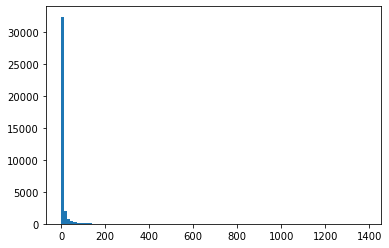

In [5]:
# degree histogram
from matplotlib import pyplot as plt
plt.hist([y for (x, y) in degree], bins=100);

The above histogram listed frequencies of degrees in the network.All the distrbution lies above 30000 in the above graph.

In [6]:
#TASK 4:
#Number of connected components in the network
G = nx.path_graph(4)
nx.add_path(G, [10, 11, 12])
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]


[4, 3]

In [7]:
nx.number_connected_components(G)

2

In [8]:
largest_cc = max(nx.connected_components(G), key=len)
print(largest_cc)

{0, 1, 2, 3}


In [9]:
#Number of edges and nodes
print(g.number_of_nodes())
print(g.number_of_edges())

36692
183831


In [10]:
Gc = max(nx.connected_components(g), key=len)
print(Gc)

{'11557', '11672', '1352', '35012', '8497', '6632', '2552', '33217', '19159', '12633', '24598', '13875', '21033', '35103', '13914', '15611', '21191', '962', '34419', '9558', '16244', '34323', '29395', '92', '6806', '17717', '24239', '19225', '25162', '2566', '17734', '10179', '28042', '33994', '442', '7107', '21616', '16253', '14630', '1951', '13344', '659', '20442', '15864', '2928', '34254', '10984', '5806', '28881', '14562', '32759', '19199', '33121', '16115', '19773', '6173', '4315', '21159', '12429', '21983', '14011', '2003', '33876', '2105', '6873', '15512', '24479', '3020', '10378', '32454', '27328', '16971', '25505', '2394', '18043', '13504', '14589', '13436', '5674', '8143', '9753', '1037', '12576', '14229', '33522', '11867', '21842', '27871', '23124', '14575', '3308', '31493', '8274', '26395', '5845', '15087', '1169', '7859', '1936', '11942', '35001', '21730', '35089', '27446', '12389', '4640', '21248', '6872', '4433', '10771', '34061', '11630', '1879', '11621', '26099', '1584

In [13]:
#TASK 5:
comp_A = []
comp_B=[]
for component in nx.connected_components(g):
    if len(set(component)) == 16:
        print("component_A")
        print(component)
        
        comp_A= g.subgraph(component)
    if len(set(component)) == 14:
        print("component_B")
        comp_B= g.subgraph(component)
        print(component)


component_A
{'34589', '34597', '34593', '34590', '34592', '34596', '34601', '34603', '34600', '34591', '34602', '34595', '34588', '34599', '34594', '34598'}
component_B
{'36138', '36146', '36137', '36142', '36144', '36136', '36139', '36141', '36134', '36143', '36135', '36145', '36140', '36147'}


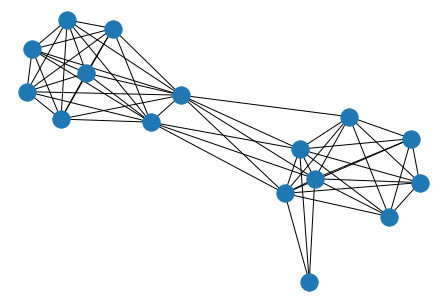

In [14]:
nx.draw(comp_A)

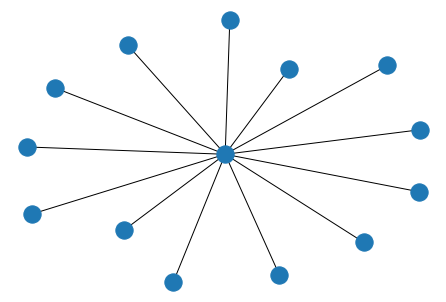

In [15]:
nx.draw(comp_B)

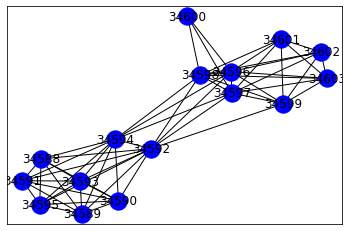

In [16]:
pos = nx.spring_layout(comp_A)
nx.draw_networkx(comp_A, pos=pos, node_color = 'b')
plt.show()

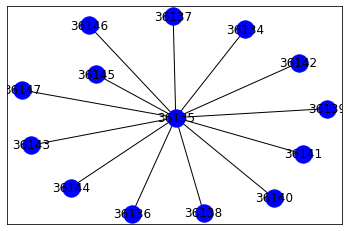

In [23]:
pos = nx.spring_layout(comp_B)
nx.draw_networkx(comp_B, pos=pos, node_color = 'b')
plt.show()

In [24]:
# import community
# partition = best_partition(comp_A)
float(len(comp_B))

14.0

In [26]:
averageADegree= sum(dict(comp_A.degree()).values())/float(len(comp_A))

7.375

In [27]:
averageBDegree= sum(dict(comp_B.degree()).values())/float(len(comp_B))

In [28]:
print(nx.density(comp_A))

0.49166666666666664


In [30]:
print(nx.density(comp_B))

0.14285714285714285


In [29]:
# pip install community/

In [31]:


import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx


#TASK 6:

In [33]:
#TASK 7:
#from community import community_louvain
import community
partition = community.best_partition(comp_A)
#drawing
size = float(len(set(partition.values())))
print(size)
pos = nx.spring_layout(comp_A)
count = 0
colors = ["r", "b", "y"]
for com in set(partition.values()) :  
    list_nodes = [nodes for nodes in partition.keys()if partition[nodes] == com]
    nx.draw_networkx_nodes(comp_A, pos, list_nodes, node_size = 400, node_color = colors[count])
    labels = {}    
    for node in list_nodes:
        #set the node name as the key and the label as its value 
        labels[node] = node # in our example, for each note (e.g, node "a"), we print the same lable (e.g., a)
    #Now only add labels to the nodes you require (the hubs in my case)
    nx.draw_networkx_labels(comp_A,pos,labels,font_size=16,font_color='k')
    count += 1
nx.draw_networkx_edges(comp_A, pos, alpha=0.5)
plt.show()
values = [(node, partition.get(node)) for node in comp_A.nodes()]
print(values)


AttributeError: module 'community' has no attribute 'best_partition'

In [19]:
#TASK 8:

# find cliques
for cliq in nx.find_cliques(comp_A):
    print(cliq)

['34601', '34598', '34596', '34602', '34599', '34597', '34603']
['34592', '34594', '34598', '34597', '34596']
['34592', '34594', '34593', '34588', '34591', '34595', '34589', '34590']
['34592', '34599', '34598', '34596', '34597']
['34600', '34596', '34598', '34597']


In [23]:
nx.large_clique_size(comp_A)

AttributeError: module 'networkx' has no attribute 'large_clique_size'

In [24]:
#TASK 9:

In [25]:
#TASK 10:

# compute node betweenness of a graph
between = nx.betweenness_centrality(comp_A)
# convert it to pandas dataframe
df_between = pd.DataFrame(list(between.items()), columns=["node", "betweenness"])
# sort nodes by betweenness in descending order
df_between = df_between.sort_values("betweenness", ascending=False)
print(df_between)

     node  betweenness
7   34592     0.271769
3   34594     0.187755
5   34598     0.106122
8   34596     0.106122
15  34597     0.106122
14  34599     0.031633
0   34593     0.000000
1   34601     0.000000
2   34588     0.000000
4   34589     0.000000
6   34595     0.000000
9   34603     0.000000
10  34600     0.000000
11  34591     0.000000
12  34590     0.000000
13  34602     0.000000


In [ ]:
#TASK 11: